In [ ]:
from google.colab import files
hr=files.upload()

Saving HR_comma_sep.csv to HR_comma_sep (5).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df1=pd.read_csv("HR_comma_sep.csv")
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df1.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


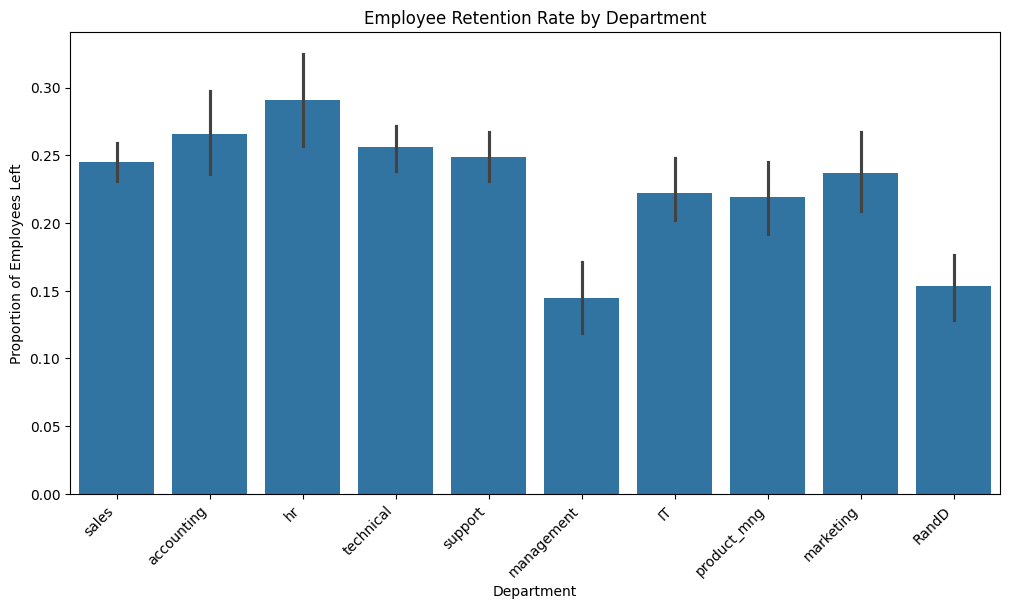

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Department', y='left', data=df1)
plt.title('Employee Retention Rate by Department')
plt.xlabel('Department')
plt.ylabel('Proportion of Employees Left')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
department_encoded = ohe.fit_transform(df1[['Department']])
department_encoded_df = pd.DataFrame(department_encoded, columns=ohe.get_feature_names_out(['Department']))
df1 = pd.concat([df1, department_encoded_df], axis=1)
df1 = df1.drop('Department', axis=1)
ordinal_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']], dtype=np.int64)
salary_encoded = ordinal_encoder.fit_transform(df1[['salary']])
df1['salary_encoded'] = salary_encoded
df1 = df1.drop('salary', axis=1)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_encoded
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.11,0.88,7,272,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


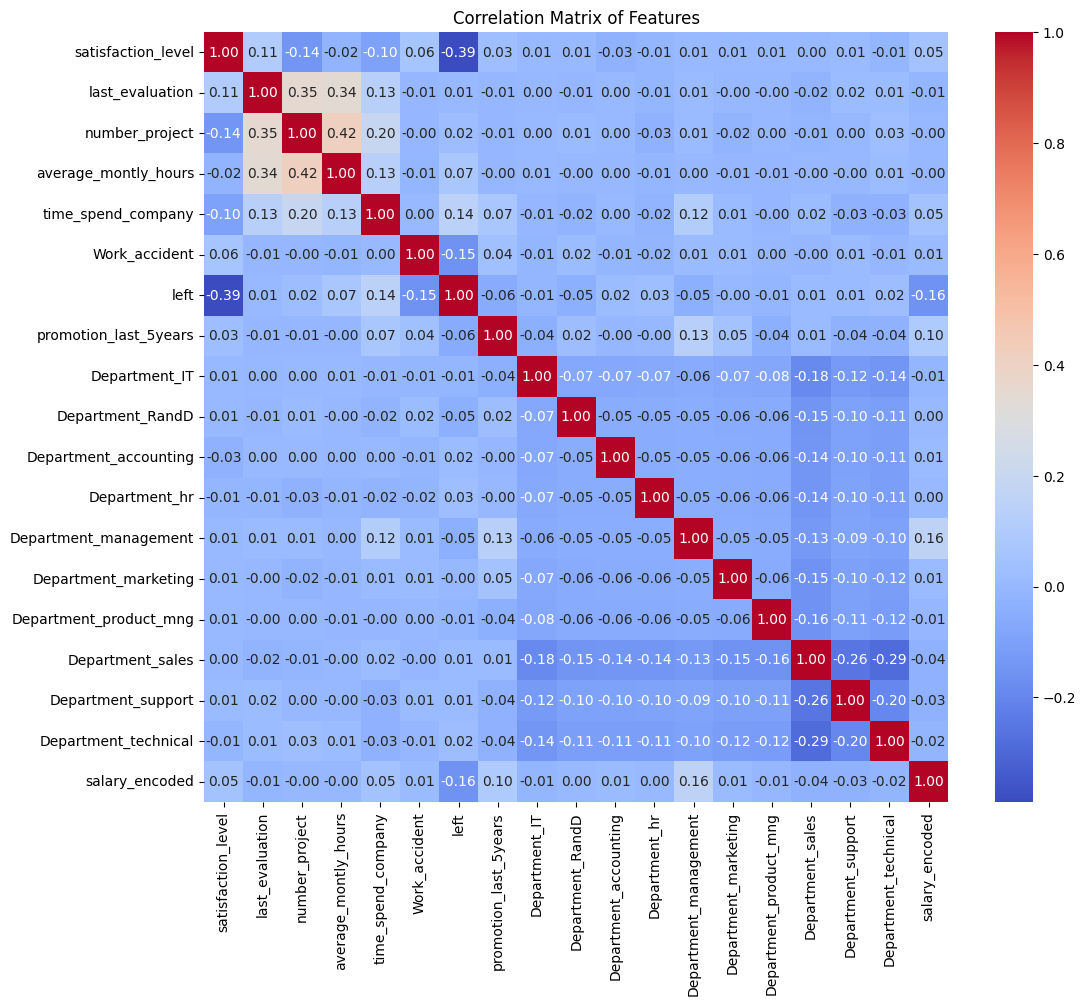

In [ ]:
correlation_matrix = df1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


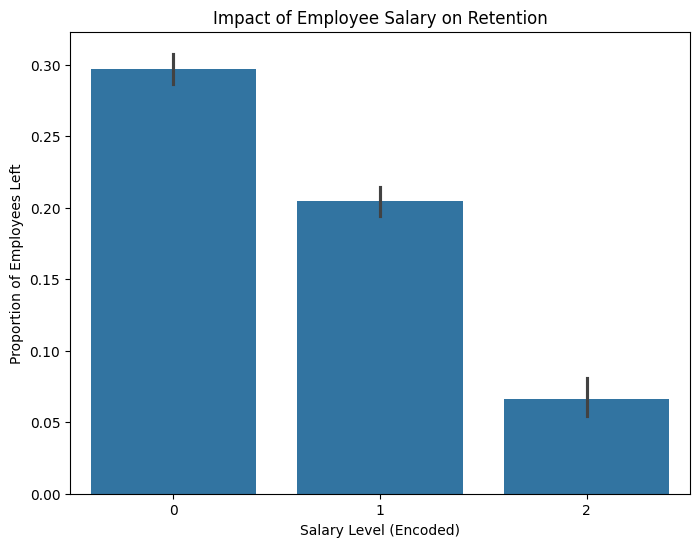

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='salary_encoded', y='left', data=df1)
plt.title('Impact of Employee Salary on Retention')
plt.xlabel('Salary Level (Encoded)')
plt.ylabel('Proportion of Employees Left')
plt.show()

In [ ]:
df_copy = df1[['number_project', 'average_montly_hours', 'time_spend_company', 'left','salary_encoded',
'satisfaction_level','Work_accident']]
df_copy.head()

,number_project,average_montly_hours,time_spend_company,left,salary_encoded,satisfaction_level,Work_accident
0,2,157,3,1,0,0.38,0
1,5,262,6,1,1,0.80,0
2,7,272,4,1,1,0.11,0
3,5,223,5,1,0,0.72,0
4,2,159,3,1,0,0.37,0


In [ ]:
X = df_copy.drop('left', axis=1)
y = df_copy['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")


Accuracy of the Logistic Regression model: 0.7856666666666666
